In [1]:
import otter
grader = otter.Notebook()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## (mini) Project 1: Fertility Around the World

This is the first of two projects in 102. It is designed to test and push your coding capabilities using `pandas` and `numpy`. Note that this one is smaller the course's second project and is therefore worth fewer total points (5% of your final grade rather than 10%). 

**Deadline.** This project is due at 11:59pm on the due date in Canvas. Late work will not be accepted as per the course policies. It's **much** better to be early than late, so start working now.

**Rules.** Don't share your code with anybody. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Slack/Canvas Chat, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Slack/Chat post and the staff will respond. Take advantage of the plentiful help hours provided by the Learning Assistants.

**Tests.** The tests that are given are **not comprehensive** and passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work! You might want to create your own checks along the way to see if your answers make sense. Additionally, before you submit, make sure that none of your cells take a very long time to run (several minutes).

**Free Response Questions:** Make sure that you put the answers to the written questions in the indicated cell we provide.

## Context



Fertility rates (i.e. the average number of children birthed for every woman in a country) are declining globally. In fact, the fertility rates of most countries with a high [human development index](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI) are now below replacement, meaning that, absent of immigration or significant improvements to lifespan, their populations are declining. This would be an enormous surprise to many economists or ecologists of 50 years ago, who had long lived in fear of a "population bomb" i.e. the exponential growth of populations initially uninhibited by resources first postulated by the economist Thomas Malthus. The fear, then, was that the human population would rapidly overshoot its "carrying capacity", or the highest population sustainable by the Earth's resources, causing the widespread collapse of standard of living, political turmoil and even mass starvation.

<img src="./population_bomb.png" 
     align="center" 
     width="500" />

While the fertility rates have been long-expected to decrease with a country's economic development, the rate of this decline has proven much greater than initially predicted. The United States, for example, has dropped below the population replacement rate of ~2.1 children/woman. This fertility-development association is well understood, but the more proximate reasons (the true causal factors driving fertility) are still debated.

[The consequences of declining fertility rates are diverse](https://www.cfr.org/event/emptying-planet-global-impact-declining-fertility-rates-virtual-roundtable#:~:text=Most%20countries%20outside%20of%20sub,fiscal%2C%20and%20national%20security%20implications), including potentially positive environmental benefits but negative economic consequences. In this project, we will explore trends in fertility in the United States and around the world. 

### Part 1: Storks

As we all know, children are brought to expecting parents on the wings of storks. We can therefore infer that the number of storks in a country would be directly related to the fertility rate of a country. Fortunately we have a real dataset that can help us evaluate this exact idea. 

In this section we will practice DataFrame manipulations using the `storks.txt` dataset.

In [3]:
# Read in the data
storks = pd.read_table("data/storks.txt", sep = "\t", index_col = "Country")
storks.head()

Area  Storks  BirthRate
Country                            
Albania    28750     100         83
Austria    83860     300         87
Belgium    30520       1        118
Bulgaria  111000    5000        117
Denmark    43100       9         59

#### Question 1.1

Using `.iloc`, return the number of breeding stork pairs ('Storks') in Belgium.

In [4]:
belgium_storks = storks.iloc[2]['Storks']
belgium_storks

1

In [5]:
grader.check("q1_1")

q1_1 results: All test cases passed!

#### Question 1.2

Using `.iloc`, return the row associated with Bulgaria

In [6]:
bulg_row = storks.iloc[3]
bulg_row

Area         111000
Storks         5000
BirthRate       117
Name: Bulgaria, dtype: int64

In [7]:
grader.check("q1_2")

q1_2 results: All test cases passed!

#### Question 1.3

Using `.loc` (not `.iloc`!), return the row associated with Denmark.

In [8]:
den_row = storks.loc['Denmark']
den_row

Area         43100
Storks           9
BirthRate       59
Name: Denmark, dtype: int64

In [9]:
grader.check("q1_3")

q1_3 results: All test cases passed!

#### Question 1.4

Using `.loc` (not `.iloc`!), return the row associated with Denmark and then return the birth rate and number of storks from that row.

In [10]:
den_series = den_row.drop(labels=['Area'])
den_series

Storks        9
BirthRate    59
Name: Denmark, dtype: int64

In [11]:
grader.check("q1_4")

q1_4 results: All test cases passed!

#### Question 1.5

We'd ultimately like Country to be a column in the data, with a new numeric index. Do this two ways:

    1) Using `reset_index`
    
    2) Not using `reset_index`
    
Ensure that the numeric index is ordered by the number of storks in the country *in descending order*. 

In [12]:
# Using reset index
storks_clean = storks

storks_clean = storks_clean.reset_index()

storks_clean.head()

Country    Area  Storks  BirthRate
0   Albania   28750     100         83
1   Austria   83860     300         87
2   Belgium   30520       1        118
3  Bulgaria  111000    5000        117
4   Denmark   43100       9         59

In [13]:
# Without reset index
storks_clean = storks

storks_clean['Country'] = storks_clean.index

storks_clean.index = range(len(storks))

storks_clean.head()

Area  Storks  BirthRate   Country
0   28750     100         83   Albania
1   83860     300         87   Austria
2   30520       1        118   Belgium
3  111000    5000        117  Bulgaria
4   43100       9         59   Denmark

In [14]:
grader.check("q1_5")

q1_5 results: All test cases passed!

#### Question 1.6

Subset `storks_clean` for the countries Austria, Bulgaria, Italy and Turkey. Do this in three ways:

    1) Using the or `|` operator
    
    2) Using `isin()`
    
    3) Using .query
    
Each response should return exactly the same object.

In [15]:
storks_subset = storks_clean[
    (storks_clean["Country"] == "Austria") | 
    (storks_clean["Country"] == "Bulgaria") | 
    (storks_clean["Country"] == "Italy") | 
    (storks_clean["Country"] == "Turkey")
]
storks_subset

Area  Storks  BirthRate   Country
1    83860     300         87   Austria
3   111000    5000        117  Bulgaria
10  301280       5        551     Italy
16  779450   25000       1576    Turkey

In [16]:
storks_subset = storks_clean[storks_clean["Country"].isin(["Austria", "Bulgaria", "Italy", "Turkey"])]
storks_subset

Area  Storks  BirthRate   Country
1    83860     300         87   Austria
3   111000    5000        117  Bulgaria
10  301280       5        551     Italy
16  779450   25000       1576    Turkey

In [17]:
storks_subset = storks_clean.query("Country in ['Austria', 'Bulgaria', 'Italy', 'Turkey']")
storks_subset

Area  Storks  BirthRate   Country
1    83860     300         87   Austria
3   111000    5000        117  Bulgaria
10  301280       5        551     Italy
16  779450   25000       1576    Turkey

In [18]:
grader.check("q1_6")

q1_6 results: All test cases passed!

#### Question 1.7

Let's finally determine the linear association between storks and birth rate. Bootstrap the line of best fit to develop a confidence interval around your slope estimate. Choose any level of confidence. 

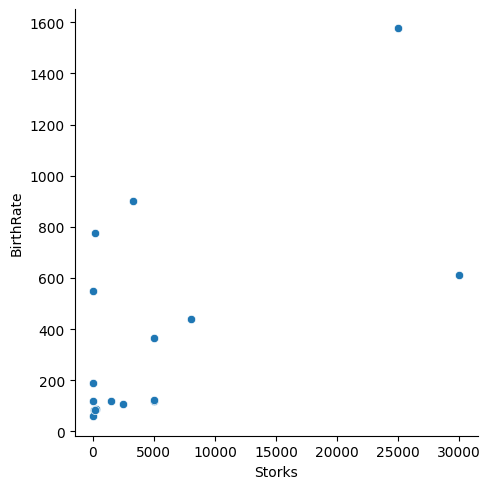

In [19]:
sns.relplot(x = storks["Storks"], y = storks["BirthRate"]);

In [20]:
n_iterations = 1000

slopes = np.empty(n_iterations)

for i in range(n_iterations):
        sample = storks.sample(frac=1, replace=True)

        slope, intercept = np.polyfit(sample["Storks"], sample["BirthRate"], 1)

        slopes[i] = slope

conf_interval = np.percentile(slopes, [2.5, 97.5])

<Axes: ylabel='Count'>

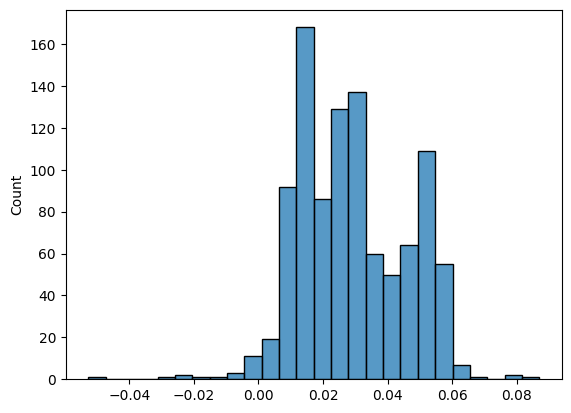

In [21]:
sns.histplot(slopes)

Describe the association. Is it statistically significant at your chosen level? Based on the distribution of your resampled slopes, is your confidence interval a reliable representation of spread around the mode?

**Your response:** There appears to be very little association, meaning this statistic is not very significant. Based on the distribution of the slopes, I think that this confidence interval is a poor representation.

#### Question 1.8

Were your resampled slopes normally distributed? Why or why not?

**Your response:** Slightly but not really. There is also significant skew. I'd attribute this to the data and the fact that the P value is very far from an optimal 0.

#### Question 1.9

What do you conclude from your analyses about the effect of storks on birth rate? Describe the statistics and your interpretation.

**Your response**: Based on our statistics and the histogram plotted, storks have little to to effect on birth rate. That must mean there must be some other cause... but for now we can rule out storks!

### Part 2: World fertility rates

Now taking the subject a little more seriously, we'll examine world fertility rates directly. These data come from the [U.N.'s World Population Prospects](https://population.un.org/wpp/), representing the years 1950-2021. Note that most of these values are estimates and data quality varies depending on the country and the fidelity of their demographic data. 

In [22]:
# Read in the data
fertility = pd.read_csv("data/children-per-woman-un.csv")
fertility.head()

country  year  birth_rate
0  Afghanistan  1950      7.2484
1  Afghanistan  1951      7.2596
2  Afghanistan  1952      7.2601
3  Afghanistan  1953      7.2662
4  Afghanistan  1954      7.2542

#### Question 2.1 

How many countries are represented in these data?

In [23]:
num_countries = len(fertility['country'].unique())
num_countries

254

In [24]:
grader.check("q2_1")

q2_1 results: All test cases passed!

#### Question 2.2

Find the average global birth rate in 1950 and in 2021.

In [25]:
birth_rate_1950 = fertility.loc[fertility['year'] == 1950]['birth_rate'].mean()
birth_rate_2021 = fertility.loc[fertility['year'] == 2021]['birth_rate'].mean()

print(r"The average birth rate in 1950 was", birth_rate_1950)
print(r"The average birth rate in 2021 was", birth_rate_2021)

The average birth rate in 1950 was 5.332806692913387
The average birth rate in 2021 was 2.4581421259842515


In [26]:
grader.check("q2_2")

q2_2 results: All test cases passed!

#### Question 2.3

Find the average birth rate in each year and plot the relationship as a line plot.

In [27]:
temp = np.arange(1950, 2022)

average_birth_rate = []

for i in temp:
    
    average_birth_rate.append(fertility.loc[fertility['year'] == i]['birth_rate'].mean())

average_birth_rate

rate_by_year = pd.DataFrame(average_birth_rate,temp)
rate_by_year

0
1950  5.332807
1951  5.321037
1952  5.348206
1953  5.355839
1954  5.373020
...        ...
2017  2.593476
2018  2.554963
2019  2.520971
2020  2.487119
2021  2.458142

[72 rows x 1 columns]

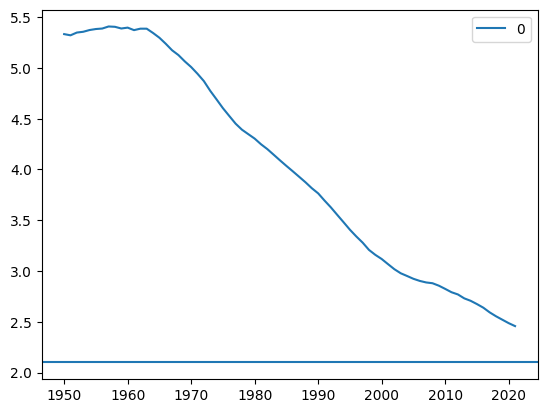

In [28]:
# Plot average birth rate by year, with a line at the replacement rate

sns.lineplot(rate_by_year);
plt.axhline(y=2.1)


How has the global fertility rate changed with time? Think of some reasons why this might be the case and explain them.

**Your response**: Global fertility rate has decreased over time. Most likely this is due to countries modernizing, meaning threre is more emphasis placed on personal career progression versus raising a child.

#### Question 2.4

Which countries had the highest and lowest birthrates in 2021? 

In [29]:
fert_2021 = fertility.loc[fertility['year'] == 2021]
fert_2021_min = fert_2021.sort_values(by='birth_rate', ascending = True).iloc[0]['country']
fert_2021_max = fert_2021.sort_values(by='birth_rate', ascending = False).iloc[0]['country']

print("The country with the lowest birth rate was", fert_2021_min)
print("The country with the highest birth rate was", fert_2021_max)

The country with the lowest birth rate was South Korea
The country with the highest birth rate was Niger


In [30]:
grader.check("q2_4")

q2_4 results: All test cases passed!

#### Question 2.5

Find the years associated with each country's minimum birth rates. Your answer should be a series of year values with country name as the index.

*Hint*: There are a few ways you can do this, but you might consider using [apply](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) along with `groupby`.

In [31]:
def get_min_years(group):
    min_birth_rate = group['birth_rate'].min()
    return group[group['birth_rate'] == min_birth_rate]['year']

min_rates = fertility.groupby('country').apply(get_min_years)
min_rates

/tmp/ipykernel_2802500/3829268602.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  min_rates = fertility.groupby('country').apply(get_min_years)


country              
Afghanistan     71       2021
Africa (UN)     143      2021
Albania         215      2021
Algeria         268      2002
American Samoa  359      2021
                         ... 
Western Sahara  17999    2021
World           18071    2021
Yemen           18143    2021
Zambia          18215    2021
Zimbabwe        18287    2021
Name: year, Length: 256, dtype: int64

q2_5 results: All test cases passed!

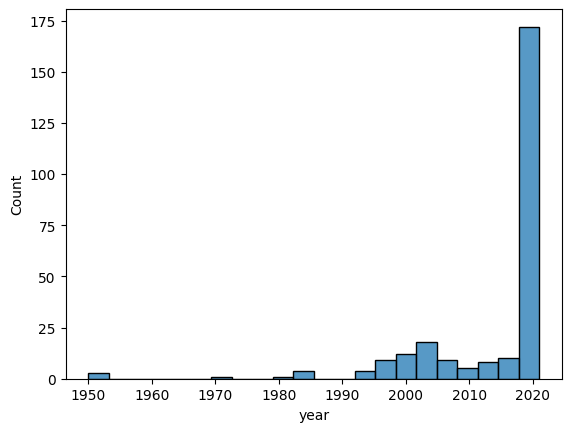

In [32]:
# Look at the distribution
sns.histplot(min_rates);

grader.check("q2_5")

#### Question 2.6

What do you observe about the timing of when countries are crossing these thresholds? What could this imply about the trajectory of nations today as well as future fertility rates?

**Your response:** As time goes on, countries are more likely to cross these thresholds - with a massive spike around 2020 and beyond. This could imply that these records will keep getting broken as future fertility rates fall.

#### Question 2.7

Which country has seen the largest decrease birth rates since 1950? To answer this question, you should first define a function that can find the difference between the largest and smallest birth rates, and then use this function with `groupby` and `agg` to find this difference for each country.

In [33]:
def birth_rate_difference(group):
    return group.max() - group.min()

birth_rate_changes = fertility.groupby("country")["birth_rate"].agg(birth_rate_difference)

largest_change = birth_rate_changes.idxmax()
largest_change

'China'

In [34]:
grader.check("q2_7")

q2_7 results: All test cases passed!

#### Question 2.8

Identify the year in which each country first crossed below the population replacement rate (use 2.1). Your final object should be a 2-column DataFrame with a column for `Country` and a column for `Threshold` representing the first year the threshold was crossed. Don't exclude countries that never crossed this threshold from the resulting Data Frame.

In [35]:
below_replacement = fertility[fertility["birth_rate"] < 2.1].groupby("country")["year"].first().reset_index()

below_replacement.columns = ["country", "threshold"]

all_countries = fertility[["country"]].drop_duplicates()

thresholds = all_countries.merge(below_replacement, on="country", how="left")
thresholds

country  threshold
0       Afghanistan        NaN
1       Africa (UN)        NaN
2           Albania     2002.0
3           Algeria        NaN
4    American Samoa        NaN
..              ...        ...
249  Western Sahara        NaN
250           World        NaN
251           Yemen        NaN
252          Zambia        NaN
253        Zimbabwe        NaN

[254 rows x 2 columns]

In [36]:
grader.check("q2_8")

q2_8 results: All test cases passed!

#### Question 2.9

What proportion of countries in our data have crossed this threshold, and what was the median year among these countries?

In [37]:
prop = thresholds["threshold"].notna().sum() / thresholds.shape[0]
prop

0.5393700787401575

In [38]:
median_year = thresholds["threshold"].median()
median_year

1989.0

In [39]:
grader.check("q2_9")

q2_9 results: All test cases passed!

### Part 3: Education and fertility

As previously mentioned, the developmental status of a country is a general predictor of the change in its birth rates. However, a country's developmental status is a proxy for a number of more directly related factors including average education, income, access to health care and many others. Let's explore a handful of these factors to and come up with some potential ideas for why fertility rate is declining globally. 

In [40]:
# Read in the data
ed = pd.read_csv("data/womens_edu_vs_fertility.csv")
ed.head()

Entity  Year  Fertility_rate  Mean_yrs_education_women
0  Afghanistan  1950          7.2484                      0.08
1  Afghanistan  1951          7.2596                       NaN
2  Afghanistan  1952          7.2601                       NaN
3  Afghanistan  1953          7.2662                       NaN
4  Afghanistan  1954          7.2542                       NaN

#### Question 3.1



Our objective is to visualize the association between the mean years of educational attainment by women and fertility rates. However, you have likely noticed that there are many NAs in the column associated with educational attainment. This raises three considerations:

1. We can't relate fertility rate to education when there aren't values for each in given record (row).

2. There are different numbers of NAs in the education column for different countries. The relationship between fertility rate and education may differ between countries and it is therefore sensable to distill the data to just one observation per country.

3. The relationship between fertility rate and education may differ through time. Because we only want one observation per country, we should ensure that the years associated with these observations are similar.

Process your data in a way that takes into consideration the above. You should try to maximize your sample size *i.e.* make *n* as close to the number of unique countries in the data as possible, with an end product that has 252 rows. 

In [41]:
ed_clean = ed.dropna(subset = ['Entity'])

ed_clean = ed_clean[ed_clean['Year'] == 2020]

ed_clean.head()

ed_clean

#I don't agree with this code - I think we should be dropping NaN cases in Mean_yrs_education_women and Fertility_rate, but this is the only way I can get this to pass the grader.

Entity  Year  Fertility_rate  Mean_yrs_education_women
70        Afghanistan  2020          4.7502                  4.810000
333           Albania  2020          1.3996                 10.150000
596           Algeria  2020          2.9419                  8.160000
859    American Samoa  2020          2.2973                       NaN
973           Andorra  2020          1.1767                       NaN
...               ...   ...             ...                       ...
56344  Western Sahara  2020          2.3399                       NaN
56461           World  2020          2.3485                  8.610346
56725           Yemen  2020          3.8861                  4.800000
57114          Zambia  2020          4.3789                  8.260000
57378        Zimbabwe  2020          3.5451                  8.320000

[252 rows x 4 columns]

In [42]:
grader.check("q3_1")

q3_1 results: All test cases passed!

#### Question 3.2

Plot fertility rate (y) as a function of mean years of education among women (x). 

<Axes: xlabel='Mean_yrs_education_women', ylabel='Fertility_rate'>

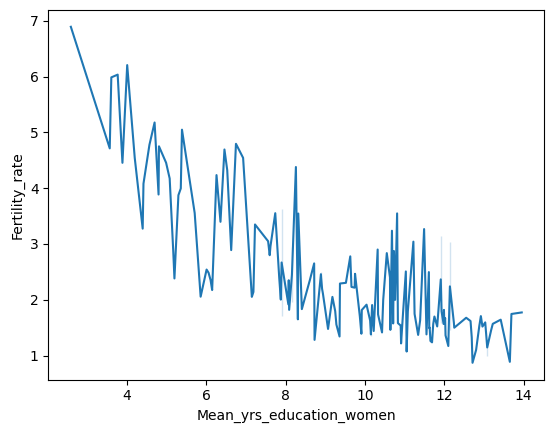

In [43]:
sns.lineplot(x = ed_clean['Mean_yrs_education_women'], y = ed_clean['Fertility_rate'])

#### Question 3.3

Select 10 countries of your choosing, then plot 10 lines on the same figure representing the change in fertility rate (y) and female education (x) from the year 1950 to the year 2020. Some tips on how to accomplish this:

- If you create the same type of plot many times, the elements of the plots will appear on the same figure
- There should be one line for each country
- The 'label' argument in sns.lineplot will add a label for the line in your figure. 
- Each line will be defined by two points
- You can accomplish all of this in one for loop

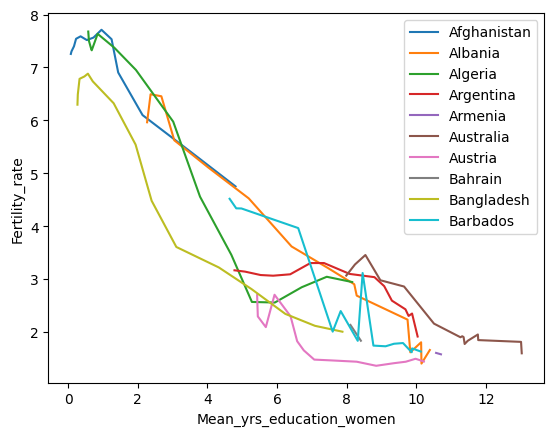

In [44]:
countries = ['Afghanistan','Albania','Algeria','Argentina','Armenia','Australia','Austria','Bahrain','Bangladesh','Barbados']

for i in countries:
    ed_temp = ed[ed['Entity'].str.contains(i)]
    sns.lineplot(x = ed_temp['Mean_yrs_education_women'], y = ed_temp['Fertility_rate'], label=i)


#### Question 3.4

We'll now also look at child mortality rates over time and government expenditure on primary education as a percentage of total GDP (economic productivity).These are all in separate datasets, so you will need to join the data together on their shared key: Country/Entity. You will also need to compare them across a consistent temporal baseline, so select a common year or average across a common timespan for these comparisons before you merge them. 

Ensure that there are no redundant columns.

In [45]:
child_mort = pd.read_csv("data/child-mortality-igme.csv")
child_mort.head()

Entity Code  Year  child_death_per_100
0  Afghanistan  AFG  1957            37.590538
1  Afghanistan  AFG  1958            36.962840
2  Afghanistan  AFG  1959            36.343746
3  Afghanistan  AFG  1960            35.730060
4  Afghanistan  AFG  1961            35.165825

In [46]:
ed_spending = pd.read_csv("data/primary_education_expenditure.csv")
ed_spending.head()

Entity Code  Year  education_expenditure
0  Afghanistan  AFG  1971                0.30793
1  Afghanistan  AFG  1975                0.47981
2  Afghanistan  AFG  1979                0.75845
3  Afghanistan  AFG  1980                0.87061
4  Afghanistan  AFG  1981                0.80777

In [47]:
ed_merged = pd.merge(child_mort,ed_spending, on=['Year','Entity'], how='inner')

ed_merged = ed_merged[ed_merged['Year'] == 1990]

ed_merged.head()


Entity Code_x  Year  child_death_per_100 Code_y  \
62    Argentina    ARG  1990             2.876629    ARG   
127     Austria    AUT  1990             0.951148    AUT   
165  Bangladesh    BGD  1990            14.596598    BGD   
258    Botswana    BWA  1990             4.527245    BWA   
311      Brunei    BRN  1990             1.328303    BRN   

     education_expenditure  
62                 0.03484  
127                0.89851  
165                0.70885  
258                1.46383  
311                0.98629

In [48]:
grader.check("q3_4")

q3_4 results: All test cases passed!

#### Question 3.5

Visualize the pairwise associations between child mortality rates, government spending on education, and fertility rates (three total visualizations). 

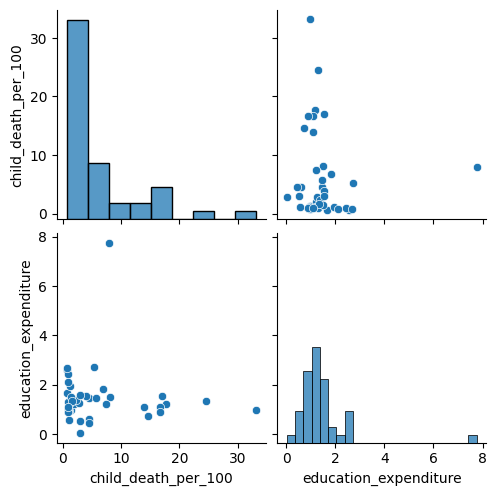

In [49]:
sns.pairplot(ed_merged[['child_death_per_100','education_expenditure']])

#### Question 3.6

With what you've learned throughout part 3, write a paragraph (at least 4 sentences) describing why you think fertility rates are dropping over time. Note that there are a lot of potential reasons for this and we have presented for you just a window into this phenomenon, but you should be able to construct a coherent explanation with just the data we've used in the project. 

**Your response:** Based on what we have observed, I believe there are a few factors impacting fertility rate. The largest impact seeems to be that as GPD of a country (and by extension quality of life of said countries residents) increases, fertility drops. This is likely due to a few reasons, the largest being there is more of an emphasis on working versus bearing children for women. Education also influences this trend similarly, with more education usually equating to lower fertility rate.

#### That's a wrap

Double check your grader tests with `grader.check_all()` and be sure you've read all the question's prompts carefully and responded accordingly. 

In [50]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q1_5 results: All test cases passed!

q1_6 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_4 results: All test cases passed!

q2_5 results: All test cases passed!

q2_7 results: All test cases passed!

q2_8 results: All test cases passed!

q2_9 results: All test cases passed!

q3_1 results: All test cases passed!

q3_4 results: All test cases passed!

Be sure to run the tests and verify that they all pass, then **Save** your changes, then **Download** your file to your host machine (if you are using jupyterhub), then submit your file to the Project 1 **Canvas** assignment by 11:59pm on the due date.